In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings

In [13]:
warnings.filterwarnings('ignore')

In [14]:
# Import the dataset that we will work with
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.csv', names= cols)
# Drop the first row as it contains coloumn names
df = df.iloc[1:]

In [15]:
print(df.head(), '\n')
print(df.info())

  sepal_length sepal_width petal_length petal_width        class
1          5.1         3.5          1.4         0.2  Iris-setosa
2          4.9           3          1.4         0.2  Iris-setosa
3          4.7         3.2          1.3         0.2  Iris-setosa
4          4.6         3.1          1.5         0.2  Iris-setosa
5            5         3.6          1.4         0.2  Iris-setosa 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  150 non-null    object
 1   sepal_width   150 non-null    object
 2   petal_length  150 non-null    object
 3   petal_width   150 non-null    object
 4   class         150 non-null    object
dtypes: object(5)
memory usage: 6.0+ KB
None


In [16]:
# Check for missing Values
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [17]:
# Convert the 'class' column to categorical
df['class'] = pd.Categorical(df['class'])

num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Convert the numerical columns to numeric types, handling potential errors
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the updated info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   class         150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None


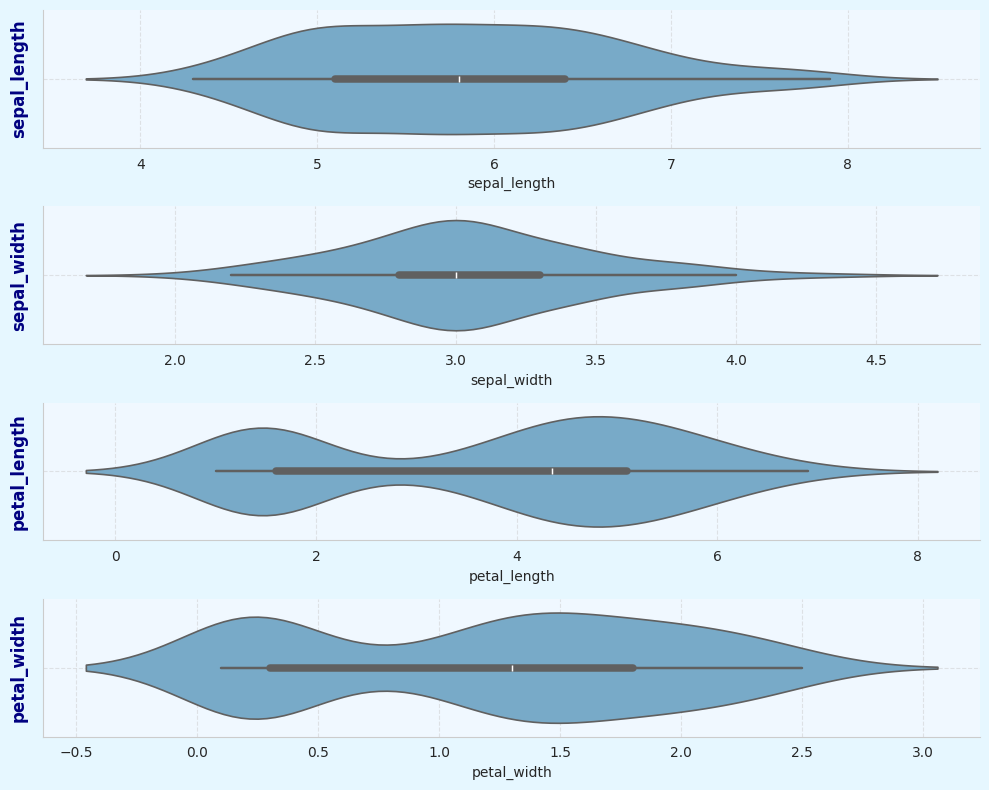

In [18]:
# Set figure size dynamically
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, len(num_cols) * 2), sharex=False)

# Set overall background color
fig.patch.set_facecolor('#E6F7FF')  # Light blue background

# Ensure axes is always iterable
if len(num_cols) == 1:
    axes = [axes]

# Loop through each feature and create a horizontal violin plot
for i, feature in enumerate(num_cols):
    sns.violinplot(x=df[feature], ax=axes[i], inner="box", palette="Blues", linewidth=1.2)
    axes[i].set_ylabel(feature, fontsize=12, fontweight='bold', color='navy')
    axes[i].grid(True, linestyle="--", alpha=0.5)
    axes[i].set_facecolor("#F0F8FF")  # Light pastel background for subplots
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

# Adjust spacing
plt.tight_layout()
plt.show()


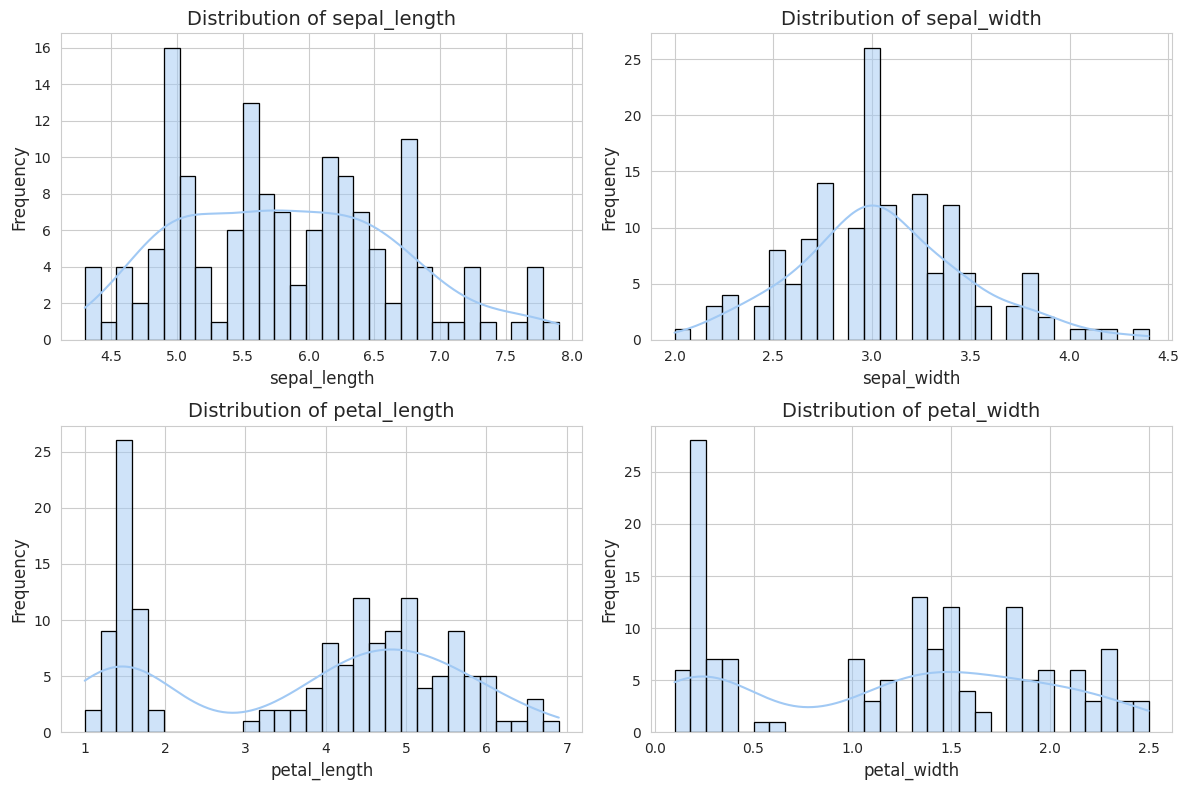

In [ ]:
# Set Seaborn style
sns.set_style("whitegrid")
sns.set_palette("pastel")


num_cols = df.select_dtypes(include=['number']).columns  # Auto-select numerical columns

# Define the number of rows and columns for subplots
num_plots = len(num_cols)
cols = 2  # Number of columns in the grid
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate rows dynamically

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))  # Adjust figure size
axes = axes.flatten()  # Flatten in case of single row

# Plot histograms
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30, edgecolor="black")
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
def replace_outliers_with_median(df, num_cols):
    df_replaced = df.copy()

    for col in num_cols:
        # Calculate Q1 and Q3
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate IQR
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        # Replace outliers with the median
        median_value = df[col].median()
        df_replaced.loc[outliers.index, col] = median_value

    return df_replaced


df = replace_outliers_with_median(df, num_cols)
